In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [5]:
train=pd.read_csv("./churn_prediction_data/train.csv")
test=pd.read_csv("./churn_prediction_data/test.csv")

In [385]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [386]:
train["Exited"].value_counts()/sum(train["Exited"].value_counts())

0    0.796
1    0.204
Name: Exited, dtype: float64

## 資料前處理

In [387]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
 13  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 875.1+ KB


In [388]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [389]:
train['Surname'].value_counts()

Smith               27
Martin              27
Scott               25
Walker              23
Fanucci             22
                    ..
Rishel               1
Shephard             1
Edmund la Touche     1
Paling               1
Onwuamaegbu          1
Name: Surname, Length: 2589, dtype: int64

In [6]:
#ID取前四個數字
train["ID"]=train['CustomerId'].astype(str).str[:5].astype(int)
#將財務商品整合成兩類，大於2個、少於等於2個
train["is_4"]=train['NumOfProducts'].apply(lambda x: 1 if x >2  else 0)
#性別數值化(男生0、女生1)
train['Gender']=train['Gender'].apply(lambda x: 1 if x =="male"  else 0)
train["greater than 70000"]=train["Balance"].apply(lambda x: 1 if x >70000  else 0)

In [19]:
#將名字數值化
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Surname'].append(test['Surname']))
train["NAME_ID"]=pd.Series(le.transform(train['Surname']))

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train[["Balance","EstimatedSalary"]])
#train["money"] = pca.transform(train[["Balance","EstimatedSalary"]])

PCA(n_components=2)

In [21]:
moneys=pd.DataFrame(pca.transform(train[["Balance","EstimatedSalary"]]),columns=['money1', 'money2'])

In [112]:
#選擇重要的特徵
select_data=train[["ID","NAME_ID",'Gender',"IsActiveMember",'Age','NumOfProducts',"is_4",'HasCrCard']]

In [113]:
#國家dummy variable
features_dummies=pd.get_dummies(train["Geography"])

In [114]:
#合併資料
#data=select_data
data=pd.concat([select_data, features_dummies],axis=1)

In [115]:
data

,ID,NAME_ID,Gender,IsActiveMember,Age,NumOfProducts,is_4,HasCrCard,France,Germany,Spain
0,15806,2646,0,1,38,2,0,0,0,0,1
1,15709,1689,0,0,54,1,0,1,1,0,0
2,15619,2104,0,1,31,1,0,1,1,0,0
3,15620,1895,0,0,40,1,0,1,0,0,1
4,15646,2868,0,1,42,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7995,15584,2899,0,1,35,2,0,1,1,0,0
7996,15606,1552,0,0,45,1,0,1,0,1,0
7997,15739,878,0,0,43,1,0,1,0,0,1
7998,15791,2854,0,0,38,1,0,0,1,0,0


## 套入LogisticRegression預測

In [126]:
#切割資料，test_size=0.005
train_data,test_data,train_labels,test_labels=train_test_split(data,train["Exited"],test_size=0.005,stratify=train["Exited"])

In [127]:
train_labels = np.array(train_labels)
train_data =  np.array(train_data)
test_labels= np.array(test_labels)
test_data = np.array(test_data)

https://www.3chy2.com.tw/3c%E8%B3%87%E8%A8%8A/%E9%80%9A%E4%BF%97%E5%9C%B0%E8%AA%AA%E9%82%8F%E8%BC%AF%E5%9B%9E%E6%AD%B8%E3%80%90logistic-regression%E3%80%91%E7%AE%97%E6%B3%95%EF%BC%88%E4%BA%8C%EF%BC%89sklearn%E9%82%8F%E8%BC%AF%E5%9B%9E%E6%AD%B8/

In [128]:
#運用羅吉斯回歸處理
#L2：liblinear、lbfgs、newton-cg、sag(solver)
#L1：newton-cg,lbfgs,sag(solver)
lm = LogisticRegression(solver="lbfgs")
lm.fit(train_data, train_labels)

LogisticRegression()

In [129]:
#訓練集的模型預測效果
lm.score(train_data,train_labels)

0.8153266331658291

In [130]:
#測試集的模型預測效果
lm.score(test_data,test_labels)

0.875

# 看係數對於模型的重要性

In [131]:
lm.coef_

array([[-3.11499008e-04, -2.32013956e-05,  0.00000000e+00,
        -1.05179947e+00,  1.01161323e-01, -2.64548917e-01,
         5.42556757e-01, -2.75059257e-02, -5.26890248e-01,
         7.46068986e-01, -2.19587312e-01]])

In [132]:
data.columns

Index(['ID', 'NAME_ID', 'Gender', 'IsActiveMember', 'Age', 'NumOfProducts',
       'is_4', 'HasCrCard', 'France', 'Germany', 'Spain'],
      dtype='object')

In [133]:
coef=lm.coef_.ravel()
columns=data.columns

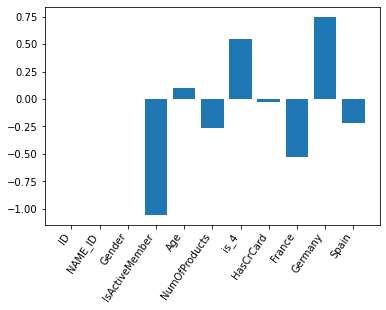

In [134]:
import matplotlib.pyplot as plt
plt.bar(np.arange(len(coef)),lm.coef_.ravel())
plt.xticks(np.arange(len(coef)),columns,rotation=55,ha="right")
plt.show()

In [413]:
#測試集預測的機率，(成功/失敗)
lm.predict_proba(test_data)

array([[0.15816467, 0.84183533],
       [0.83070626, 0.16929374],
       [0.82888872, 0.17111128],
       [0.55666952, 0.44333048],
       [0.97275161, 0.02724839],
       [0.98828345, 0.01171655],
       [0.15087363, 0.84912637],
       [0.90121006, 0.09878994],
       [0.81749342, 0.18250658],
       [0.97224751, 0.02775249],
       [0.2802765 , 0.7197235 ],
       [0.61199812, 0.38800188],
       [0.98889237, 0.01110763],
       [0.08887512, 0.91112488],
       [0.86592374, 0.13407626],
       [0.92489196, 0.07510804],
       [0.97936835, 0.02063165],
       [0.85565766, 0.14434234],
       [0.91105607, 0.08894393],
       [0.69886251, 0.30113749],
       [0.97619652, 0.02380348],
       [0.88344816, 0.11655184],
       [0.89420544, 0.10579456],
       [0.41124718, 0.58875282],
       [0.87528729, 0.12471271],
       [0.89110672, 0.10889328],
       [0.90673132, 0.09326868],
       [0.90583303, 0.09416697],
       [0.89533366, 0.10466634],
       [0.97571527, 0.02428473],
       [0.

<Figure size 432x288 with 0 Axes>

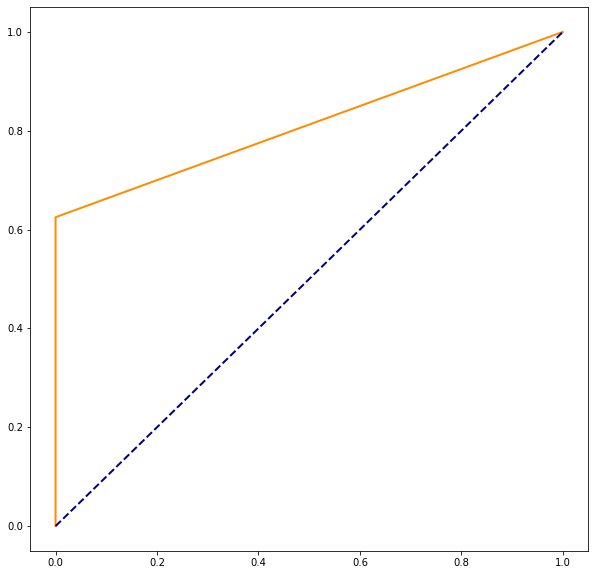

In [348]:
#畫ROC圖表
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr,tpr,threshold =roc_curve(test_labels, lm.predict(test_data))
roc_auc = auc(fpr,tpr) ###計算auc的值 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.show()

In [349]:
#ROC的面積(1最好)
roc_auc

0.8125

# 交叉應證

In [414]:
from sklearn.model_selection import KFold,StratifiedKFold,ShuffleSplit
cv=StratifiedKFold(n_splits=5)
cv1=KFold(n_splits=5)
cv2=ShuffleSplit(n_splits=5,test_size=0.2)

In [417]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(lm,data,train["Exited"],cv=cv,scoring='accuracy')
print(scores.mean())

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0.8401250000000001


c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

## test資料預測

In [350]:
#test資料前處理
test["ID"]=test['CustomerId'].astype(str).str[:4].astype(int)
test["is_4"]=test['NumOfProducts'].apply(lambda x: 1 if x >2  else 0)
test["NAME_ID"]=pd.Series(le.transform(test['Surname']))
test['Gender']=test['Gender'].apply(lambda x: 1 if x =="male"  else 0)

In [351]:
#特徵選擇
select_data=test[["ID","NAME_ID",'Gender',"IsActiveMember",'Age','NumOfProducts',"is_4",'HasCrCard']]

In [352]:
#特徵dummy
features_dummies=pd.get_dummies(test["Geography"])

In [353]:
#合併資料
data=pd.concat([select_data, features_dummies],axis=1)

In [354]:
#預測結果
lm.predict(data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [355]:
#預測為1的比例
sum(lm.predict(data)>roc_auc)/2000

0.097

# 匯入資料

In [356]:
#羅吉斯資料
d = {"RowNumber":test.RowNumber,"Exited":lm.predict(data)}
df = pd.DataFrame(d)


#df.to_csv("./output/logistic12new.csv")

In [36]:
#拿過去資料預測的資料，來投票
data_6=pd.read_csv("logistic6.csv")
data_7=pd.read_csv("logistic7.csv")
data_8=pd.read_csv("logistic8.csv")
data_9=pd.read_csv("logistic9.csv")
data_10=pd.read_csv("logistic10.csv")

In [37]:
a=data_6["Exited"]+data_7["Exited"]+data_8["Exited"]+data_9["Exited"]+data_10["Exited"]
a[a<5]=0
a[a>4]=1

In [38]:
sum(a)/2000

0.0795

In [39]:
#d = {"RowNumber":test.RowNumber,"Exited":a}
#df = pd.DataFrame(d)
#df.to_csv("combine3.csv")